# Exploratory Data Analysis with Python

We will explore the NYC MTA turnstile data set. These data files are from the New York Subway. It tracks the hourly entries and exits to turnstiles (UNIT) by day in the subway system.

Here is an [example of what you could do with the data](https://jameskao.me/analyzing-the-nyc-subway-dataset/). James Kao investigates how subway ridership is affected by incidence of rain.

<br>
<font color="red">
    NOTE:
    <br>
    This notebook uses code found in the
    <a href="https://github.com/TimothyHelton/k2datascience/blob/master/k2datascience/nyc_mta.py">
    <strong>k2datascience.nyc_mta</strong></a> package.
    To execute all the cells do one of the following items:
    <ul>
        <li>Install the k2datascience package to the active Python interpreter.</li>
        <li>Add k2datascience/k2datascience to the PYTHON_PATH system variable.</li>
        <li>Create a link to the nyc_mta.py file in the same directory as this notebook.</li>
</font>

---
### Imports

In [1]:
from collections import defaultdict
import csv
import os
import os.path as osp

from dateutil.parser import parse
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from k2datascience import nyc_mta

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
%matplotlib inline

---
### Download Data

#### Would you like to download New York City MTA Turnstile data?
- Each file is for a week of data and is approximately 24 Megabytes in size.

In [2]:
download = False
file_quantity = 2

Scrape [MTA Turnstile Web Page](http://web.mta.info/developers/turnstile.html) to extract all available data files.

In [3]:
d = nyc_mta.TurnstileData()
if download:
    d.write_data_files(qty=file_quantity)
    print(f'\n\nThe raw data files were written out to:\n\n{d.data_dir}')

---
## Exercise 1

- Download at least 2 weeks worth of [MTA turnstile data](http://web.mta.info/developers/turnstile.html) (You can do this manually or via Python)
- Open up a file, use csv reader to read it, make a python dict where there is a key for each (C/A, UNIT, SCP, STATION). These are the first four columns. The value for this key should be a list of lists. Each list in the list is the rest of the columns in a row. For example, one key-value pair should look like


        {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
               ['NQR456', 'BMT', '01/03/2015', '03:00:00', 'REGULAR', '0004945474', '0001675324'],          
                 ['NQR456', 'BMT', '01/03/2015', '07:00:00', 'REGULAR', '0004945478', '0001675333'],  
                ['NQR456', 'BMT', '01/03/2015', '11:00:00', 'REGULAR', '0004945515', '0001675364'],
              ...   
         ] 
        }

*Store all the weeks in a data structure of your choosing*

### Data File Path

In [4]:
data_file = '170401.txt'
data_dir = osp.join('..', 'data', 'nyc_mta_turnstile')
data_file_path = osp.join(data_dir, data_file)

### Create Excersize 1 Dictionary

In [5]:
turnstile = defaultdict(list)
with open(data_file_path, 'r') as f:
    reader = csv.reader(f)
    initial_row = True
    for row in reader:
        if not initial_row:
            turnstile[tuple(row[:4])].append([x.strip() for x in row[4:]])
        else:
            header = [x.strip() for x in row]
            initial_row = False

#### Header

- **C/A**: Control Area (A002)
- **UNIT**: Remote Unit for a station (R051)
- **SCP**: Subunit Channel Position represents an specific address for a device (02-00-00)
- **STATION**: Represents the station name the device is located at
- **LINENAME**: Represents all train lines that can be boarded at this station
    - Normally lines are represented by one character.
    - LINENAME 456NQR represents train server for 4, 5, 6, N, Q, and R trains.


- **DIVISION**: Represents the Line originally the station belonged to BMT, IRT, or IND   
- **DATE**: Represents the date (MM-DD-YY)
- **TIME**: Represents the time (hh:mm:ss) for a scheduled audit event
- **DESc**: Represent the "REGULAR" scheduled audit event (Normally occurs every 4 hours)
    - Audits may occur more that 4 hours due to planning, or troubleshooting activities. 
    - Additionally, there may be a "RECOVR AUD" entry: This refers to a missed audit that was recovered. 
    
    
- **ENTRIES**: The comulative entry register value for a device
- **EXIST**: The cumulative exit register value for a device

In [6]:
header

['C/A',
 'UNIT',
 'SCP',
 'STATION',
 'LINENAME',
 'DIVISION',
 'DATE',
 'TIME',
 'DESC',
 'ENTRIES',
 'EXITS']

#### Example Entry in Turnstile Dictionary

In [7]:
turnstile[('A002', 'R051', '02-00-00', '59 ST')][:3]

[['NQR456W',
  'BMT',
  '03/25/2017',
  '00:00:00',
  'REGULAR',
  '0006108321',
  '0002069313'],
 ['NQR456W',
  'BMT',
  '03/25/2017',
  '04:00:00',
  'REGULAR',
  '0006108343',
  '0002069319'],
 ['NQR456W',
  'BMT',
  '03/25/2017',
  '08:00:00',
  'REGULAR',
  '0006108360',
  '0002069347']]

### Create Pandas DataFrame

In [8]:
d.get_data()
d.data.shape
d.data.head()

(396013, 11)

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,00:00:00,REGULAR,6108321,2069313
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,04:00:00,REGULAR,6108343,2069319
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,08:00:00,REGULAR,6108360,2069347
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,12:00:00,REGULAR,6108462,2069456
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,16:00:00,REGULAR,6108689,2069525


---
## Exercise 2
- Let's turn this into a time series.

 For each key (basically the control area, unit, device address and station of a specific turnstile), have a list again, but let the list be comprised of just the point in time and the cumulative count of entries.

This basically means keeping only the date, time, and entries fields in each list. You can convert the date and time into datetime objects -- That is a python class that represents a point in time. You can combine the date and time fields into a string and use the [dateutil](https://dateutil.readthedocs.io/en/stable/) package to convert it into a datetime object.

Your new dict should look something like
 
    {    ('A002','R051','02-00-00','LEXINGTON AVE'):    
             [
                [datetime.datetime(2013, 3, 2, 3, 0), 3788],
                [datetime.datetime(2013, 3, 2, 7, 0), 2585],
                [datetime.datetime(2013, 3, 2, 12, 0), 10653],
                [datetime.datetime(2013, 3, 2, 17, 0), 11016],
                [datetime.datetime(2013, 3, 2, 23, 0), 10666],
                [datetime.datetime(2013, 3, 3, 3, 0), 10814],
                [datetime.datetime(2013, 3, 3, 7, 0), 10229],
                ...
              ],
     ....
     }



### Create Exersize 2 Time Series Dictionary

Note: The extended computational time is due to the dateutil operation.

In [9]:
turnstile_ts = {}
for k, v in turnstile.items():
    turnstile_ts[k] = [[parse(f'{x[2]} {x[3]}'), int(x[-2])] for x in v]

#### Example Entry in Turnstile Time Series Dictionary

In [10]:
turnstile_ts[('A002', 'R051', '02-00-00', '59 ST')][:10]

[[datetime.datetime(2017, 3, 25, 0, 0), 6108321],
 [datetime.datetime(2017, 3, 25, 4, 0), 6108343],
 [datetime.datetime(2017, 3, 25, 8, 0), 6108360],
 [datetime.datetime(2017, 3, 25, 12, 0), 6108462],
 [datetime.datetime(2017, 3, 25, 16, 0), 6108689],
 [datetime.datetime(2017, 3, 25, 20, 0), 6108983],
 [datetime.datetime(2017, 3, 26, 0, 0), 6109170],
 [datetime.datetime(2017, 3, 26, 4, 0), 6109213],
 [datetime.datetime(2017, 3, 26, 8, 0), 6109224],
 [datetime.datetime(2017, 3, 26, 12, 0), 6109284]]

### Add Time Stamp Series to Pandas DataFrame

In [11]:
d.get_time_stamp()
d.data.shape
d.data.head()

(396013, 12)

,c_a,unit,scp,station,linename,division,date,time,desc,entries,exits,time_stamp
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,00:00:00,REGULAR,6108321,2069313,2017-03-25 00:00:00
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,04:00:00,REGULAR,6108343,2069319,2017-03-25 04:00:00
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,08:00:00,REGULAR,6108360,2069347,2017-03-25 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,12:00:00,REGULAR,6108462,2069456,2017-03-25 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,03/25/2017,16:00:00,REGULAR,6108689,2069525,2017-03-25 16:00:00


---
## Exercise 3
- These counts are cumulative every n hours. We want total daily entries. 

Now make it that we again have the same keys, but now we have a single value for a single day, which is not cumulative counts but the total number of passengers that entered through this turnstile on this day.


In [12]:
daily_total = defaultdict(list)
for k, v in turnstile_ts.items():
    days = set([x[0].date() for x in v])
    for day in sorted(days):
        daily_total[k].append([day, sum([x[1] for x in v if x[0].date() == day])])

#### Example Entry in Turnstile Time Series Dictionary

In [13]:
daily_total[('A002', 'R051', '02-00-00', '59 ST')]

[[datetime.date(2017, 3, 25), 36651158],
 [datetime.date(2017, 3, 26), 36656063],
 [datetime.date(2017, 3, 27), 36660942],
 [datetime.date(2017, 3, 28), 36670134],
 [datetime.date(2017, 3, 29), 36679266],
 [datetime.date(2017, 3, 30), 36689181],
 [datetime.date(2017, 3, 31), 36698829]]

### Return Daily Entry Totals Using Pandas

In [14]:
d.turnstile_daily.head(10)
d.turnstile_daily.tail(10)

entries     exits
c_a  unit station scp      date                          
A002 R051 59 ST   02-00-00 2017-03-25  36651158  12416530
                           2017-03-26  36656063  12418103
                           2017-03-27  36660942  12420525
                           2017-03-28  36670134  12424098
                           2017-03-29  36679266  12427620
                           2017-03-30  36689181  12431192
                           2017-03-31  36698829  12434815
                           2017-04-01  36706941  12437604
                           2017-04-02  36712675  12439341
                           2017-04-03  36718244  12441609

entries  exits
c_a   unit station       scp      date                      
TRAM2 R469 RIT-ROOSEVELT 00-05-01 2017-03-29    33324   1764
                                  2017-03-30    33324   1764
                                  2017-03-31    33324   1764
                                  2017-04-01    33324   1764
                                  2017-04-02    33324   1764
                                  2017-04-03    16662    882
                                  2017-04-04    33324   1764
                                  2017-04-05    33324   1767
                                  2017-04-06    33324   1770
                                  2017-04-07    38878   2065

---
## Exercise 4
- We will plot the daily time series for a turnstile.

In ipython notebook, add this to the beginning of your next cell:    

    %matplotlib inline

This will make your matplotlib graphs integrate nicely with the notebook.
To plot the time series, import matplotlib with 

    import matplotlib.pyplot as plt

Take the list of [(date1, count1), (date2, count2), ...], for the turnstile and turn it into two lists:
dates and counts. This should plot it:

    plt.figure(figsize=(10,3))
    plt.plot(dates,counts)


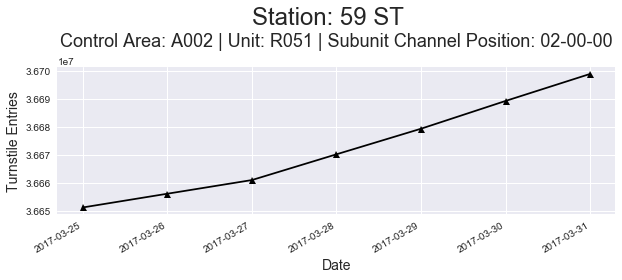

In [15]:
label_size = 14

fig = plt.figure('Station 59 ST: Daily Turnstile Entries', figsize=(10, 3),
                 facecolor='white', edgecolor='black')
ax1 = plt.subplot2grid((1, 1), (0, 0))

dt = daily_total[('A002', 'R051', '02-00-00', '59 ST')]
dates = [x[0] for x in dt]
entries = [x[1] for x in dt]

ax1.plot_date(dates, entries, '^k-')

plt.suptitle('Station: 59 ST', fontsize=24, y=1.16);
plt.title('Control Area: A002 | Unit: R051 | Subunit Channel Position: 02-00-00',
          fontsize=18, y=1.10);
ax1.set_xlabel('Date', fontsize=label_size)
ax1.set_ylabel('Turnstile Entries', fontsize=label_size)
fig.autofmt_xdate();

### Pandas Plot

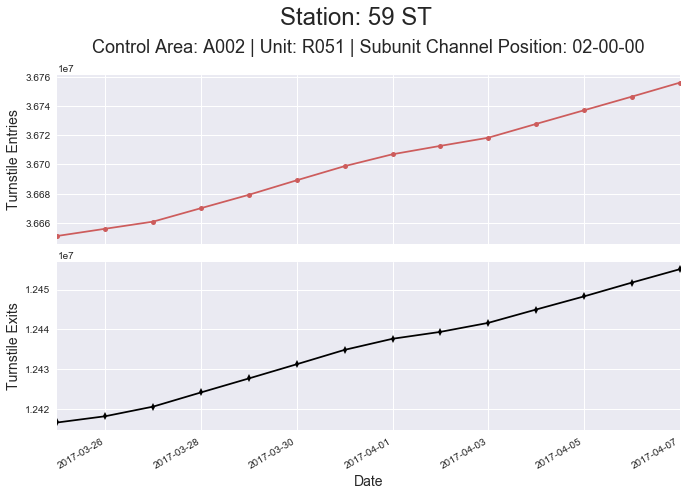

In [16]:
label_size = 14
marker_size = 5

fig = plt.figure('Station 59 ST: Daily Turnstile Entries', figsize=(10, 7),
                 facecolor='white', edgecolor='black')
rows, cols = (2, 1)
ax1 = plt.subplot2grid((rows, cols), (0, 0))
ax2 = plt.subplot2grid((rows, cols), (1, 0), sharex=ax1)

dt = d.turnstile_daily.query(('c_a == "A002"'
                              '& unit == "R051"'
                              '& scp == "02-00-00"'
                              '& station == "59 ST"'))
dt.plot(x=dt.index.levels[4], y='entries', color='IndianRed', legend=None,
        markersize=marker_size, marker='o', ax=ax1)

ax1.set_title('Control Area: A002 | Unit: R051 | Subunit Channel Position: 02-00-00',
              fontsize=18, y=1.10)
ax1.set_ylabel('Turnstile Entries', fontsize=label_size)

dt.plot(x=dt.index.levels[4], y='exits', color='black', legend=None,
        markersize=marker_size, marker='d', ax=ax2)

ax2.set_xlabel('Date', fontsize=label_size)
ax2.set_ylabel('Turnstile Exits', fontsize=label_size)

plt.suptitle('Station: 59 ST', fontsize=24, y=1.04);
plt.tight_layout()
fig.autofmt_xdate();

---
## Exercise 5
- So far we've been operating on a single turnstile level, let's combine turnstiles in the same ControlArea/Unit/Station combo. There are some ControlArea/Unit/Station groups that have a single turnstile, but most have multiple turnstilea-- same value for the C/A, UNIT and STATION columns, different values for the SCP column.

We want to combine the numbers together -- for each ControlArea/UNIT/STATION combo, for each day, add the counts from each turnstile belonging to that combo.


### Pandas Return Total Passengers Filtered By Control Area, Unit, Station and Date

In [17]:
d.get_station_daily(control_area=True, unit=True)
station_daily_all = d._station_daily
station_daily_all.head(10)
station_daily_all.tail(10)

entries      exits
c_a  unit station date       week weekday                      
A002 R051 59 ST   2017-03-25 12   5        325026630  152589940
                  2017-03-26 12   6        325074736  152617301
                  2017-03-27 13   0        325123649  152653387
                  2017-03-28 13   1        325208230  152706088
                  2017-03-29 13   2        325293469  152760234
                  2017-03-30 13   3        325384470  152815615
                  2017-03-31 13   4        325473896  152869893
                  2017-04-01 13   5        325550538  152913131
                  2017-04-02 13   6        325603548  152943561
                  2017-04-03 14   0        325658809  152982749

entries    exits
c_a   unit station       date       week weekday                   
TRAM2 R469 RIT-ROOSEVELT 2017-03-29 13   2        53124295  2824056
                         2017-03-30 13   3        53144162  2824410
                         2017-03-31 13   4        53161031  2824641
                         2017-04-01 13   5        53173541  2825021
                         2017-04-02 13   6        53192221  2825501
                         2017-04-03 14   0        26604761  1412902
                         2017-04-04 14   1        53234340  2826194
                         2017-04-05 14   2        53253030  2826522
                         2017-04-06 14   3        53273010  2826839
                         2017-04-07 14   4        62171498  3298232

---
## Exercise 6
- Similarly, combine everything in each station, and come up with a time series of `[(date1, count1),(date2,count2),...]` type of time series for each STATION, by adding up all the turnstiles in a station.

### Pandas Return Total Passengers Filtered By Station and Date

In [18]:
station_daily = d.station_daily
station_daily.query('station == "59 ST"')

entries        exits
station date       week weekday                          
59 ST   2017-03-25 12   5        12079560867  10083394396
        2017-03-26 12   6        12079768829  10083556718
        2017-03-27 13   0        15672795310  13104307168
        2017-03-28 13   1        13876841143  11594370646
        2017-03-29 13   2        13877291288  11594713332
        2017-03-30 13   3        12079842584  10080971796
        2017-03-31 13   4        12081807216  10085128441
        2017-04-01 13   5        12082179709  10085383640
        2017-04-02 13   6        10285999779   8575253070
        2017-04-03 14   0        12082692498  10085775094
        2017-04-04 14   1        12083137197  10086117226
        2017-04-05 14   2        12083592333  10086463996
        2017-04-06 14   3        12131879938  10125401894
        2017-04-07 14   4        12084508296  10087163888

---
## Exercise 7
- Plot the time series for a station

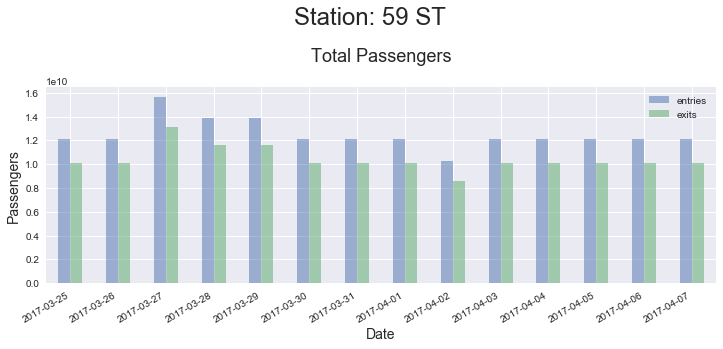

In [19]:
label_size = 14

fig = plt.figure('Station 59 ST: Total Passengers', figsize=(12, 4),
                 facecolor='white', edgecolor='black')
ax1 = plt.subplot2grid((1, 1), (0, 0))

dt = station_daily.query('station == "59 ST"')
dt.plot(kind='bar', x=dt.index.levels[1], alpha=0.5, ax=ax1)

ax1.set_xlabel('Date', fontsize=label_size)
ax1.set_ylabel('Passengers', fontsize=label_size)

plt.suptitle('Station: 59 ST', fontsize=24, y=1.16);
plt.title('Total Passengers', fontsize=18, y=1.10);
fig.autofmt_xdate();

---
## Exercise 8
- Make one list of counts for **one** week for one station. Monday's count, Tuesday's count, etc. so it's a list of 7 counts.
Make the same list for another week, and another week, and another week.
`plt.plot(week_count_list)` for every `week_count_list` you created this way. You should get a rainbow plot of weekly commute numbers on top of each other.



In [20]:
week_59st = station_daily.query('station == "59 ST"').reset_index()
week_59st

,station,date,week,weekday,entries,exits
0,59 ST,2017-03-25,12,5,12079560867,10083394396
1,59 ST,2017-03-26,12,6,12079768829,10083556718
2,59 ST,2017-03-27,13,0,15672795310,13104307168
3,59 ST,2017-03-28,13,1,13876841143,11594370646
4,59 ST,2017-03-29,13,2,13877291288,11594713332
5,59 ST,2017-03-30,13,3,12079842584,10080971796
6,59 ST,2017-03-31,13,4,12081807216,10085128441
7,59 ST,2017-04-01,13,5,12082179709,10085383640
8,59 ST,2017-04-02,13,6,10285999779,8575253070
9,59 ST,2017-04-03,14,0,12082692498,10085775094


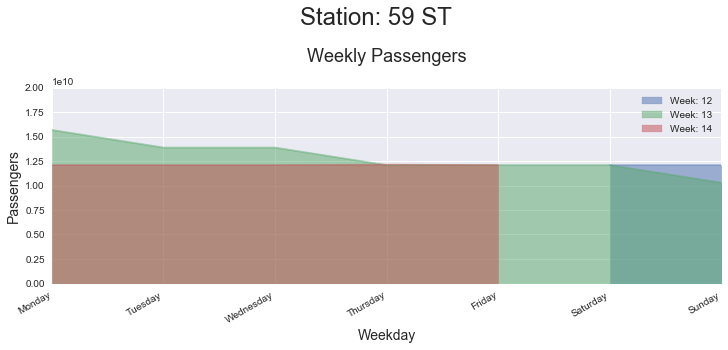

In [21]:
label_size = 14

fig = plt.figure('Station 59 ST: Weekly Passengers', figsize=(12, 4),
                 facecolor='white', edgecolor='black')
ax1 = plt.subplot2grid((1, 1), (0, 0))

for w in week_59st.week.unique():
    mask = f'station == "59 ST" & week == {w}' 
    dt = station_daily.query(mask).reset_index()
    dt.plot(kind='area', x=dt.weekday, y='entries', alpha=0.5, label=f'Week: {w}', ax=ax1)

ax1.set_xlabel('Weekday', fontsize=label_size)
ax1.set_ylabel('Passengers', fontsize=label_size)
ax1.set_xticklabels(['Monday', 'Tuesday', 'Wednesday', 'Thursday',
                     'Friday', 'Saturday', 'Sunday'])
x_min, x_max, y_min, y_max = ax1.axis()
ax1.axis((x_min, x_max, 0, 2e10))

plt.suptitle('Station: 59 ST', fontsize=24, y=1.16);
plt.title('Weekly Passengers', fontsize=18, y=1.10);
fig.autofmt_xdate();

---
## Exercise 9
- Over multiple weeks, sum total ridership for each station and sort them, so you can find out the stations with the highest traffic during the time you investigate

In [22]:
mask = ['station',
        pd.Series([x.week for x in d.data.time_stamp], name='week')]
station_weekly = d.data.groupby(mask)['entries', 'exits'].sum()

In [23]:
station_weekly.sort_values('entries', ascending=False)

,,entries,exits
station,week,,
42 ST-PORT AUTH,13,319124309256,262435830256
125 ST,13,287895323372,164547715629
23 ST,13,277882381357,256229309479
CANAL ST,13,253324718914,255730969063
TIMES SQ-42 ST,13,243078609523,190566915810
42 ST-PORT AUTH,14,233193143429,191833295202
CHAMBERS ST,13,213061631997,188965251698
125 ST,14,209843368775,119566654740
23 ST,14,208665500718,191553604149


---
## Exercise 10
- Make a single list of these total ridership values and plot it with `plt.hist(total_ridership_counts)` to get an idea about the distribution of total ridership among different stations.   
This should show you that most stations have a small traffic, and the histogram bins for large traffic volumes have small bars.

*Additional Hint*:    
If you want to see which stations take the meat of the traffic, you can sort the total ridership counts and make a `plt.bar` graph. For this, you want to have two lists: the indices of each bar, and the values. The indices can just be `0,1,2,3,...`, so you can do 

    indices = range(len(total_ridership_values))
    plt.bar(indices, total_ridership_values)

    

In [24]:
station_group = d.data.groupby('station')
station_entries = station_group['entries'].sum()
station_entries.tail()

station
WOODHAVEN BLVD     14359016536
WOODLAWN            2510281023
WORLD TRADE CTR     3213463710
YORK ST             2925643268
ZEREGA AV           4464846535
Name: entries, dtype: int64

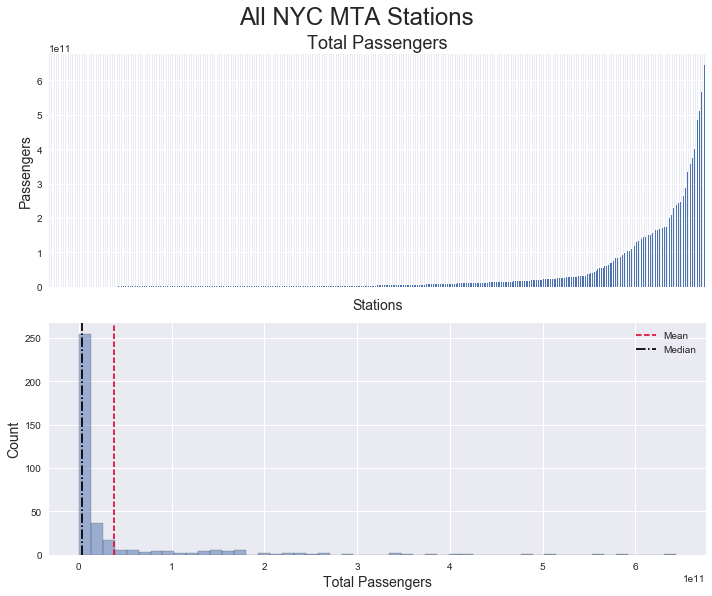

In [25]:
label_size = 14
suptitle_size = 24
title_size = 18

bins = 50

fig = plt.figure('', figsize=(10, 8),
                 facecolor='white', edgecolor='black')
rows, cols = (2, 1)
ax1 = plt.subplot2grid((rows, cols), (0, 0))
ax2 = plt.subplot2grid((rows, cols), (1, 0))

station_entries.sort_values().plot(kind='bar', ax=ax1)

ax1.set_title('Total Passengers', fontsize=title_size);
ax1.set_xlabel('Stations', fontsize=label_size)
ax1.set_ylabel('Passengers', fontsize=label_size)
ax1.set_xticklabels('')

station_entries.plot(kind='hist', alpha=0.5, bins=bins,
                     edgecolor='black', label='_nolegend_', ax=ax2)
ax2.axvline(station_entries.mean(), color='crimson',
            label='Mean', linestyle='--')
ax2.axvline(station_entries.median(), color='black',
            label='Median', linestyle='-.')

ax2.legend()
ax2.set_xlabel('Total Passengers', fontsize=label_size)
ax2.set_ylabel('Count', fontsize=label_size)

plt.suptitle('All NYC MTA Stations', fontsize=suptitle_size, y=1.03);
plt.tight_layout();